In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rc("figure", figsize=(10, 6))

PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.random.seed(12345)
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)



# 빅데이터 분석에 필요한 pandas의 데이터프레임의 반드시 알아야하는 핵심 기능(7장, 8장, 9장, 10장)
    * 데이터프레임 생성: pd.DataFrame(데이터셋) 함수를 사용하여 데이터프레임을 생성할 수 있다. 
    * 데이터프레임 인덱싱: loc(행) 및 iloc(행이 숫자로 되어 있을 시(int)) 인덱서를 사용하여 데이터프레임의 특정 행과 열을 선택할 수 있다.
    * 데이터프레임 슬라이싱: 슬라이싱 연산자[start:end::step]를 사용하여 데이터프레임의 부분을 선택할 수 있다.
    * 데이터프레임 필터링: 불리언 마스크(조건식)를 사용하여 데이터프레임의 행과 열을 필터링할 수 있다.
    * 데이터프레임 정렬: sort_values() (columns 기준) / sort_index() (index 기준) 메서드를 사용하여 데이터프레임을 열 또는 인덱스별로 정렬할 수 있다.
    * 데이터프레임 집계: groupby() / agg() / apply() 메서드를 사용하여 데이터프레임을 그룹화하고 집계 연산을 수행할 수 있다.
    * 데이터프레임 결측치/중복값 처리: dropna() / drop_duplicates() / fillna() 메서드를 사용하여 데이터프레임의 결측치를 채울 수 있다.
    * 데이터프레임 결합: merge() 또는 concat() 메서드를 사용하여 여러 데이터프레임을 결합할 수 있다.


## # 7장 데이터 정제 및 준비(Data Cleaning and Preparation)
* 7.1 누락된 데이터 처리하기
  * np.nan
  * None
  * isna() : 결측치에 대해 True 값으로 반환
  * dropna() : 결측치 제거하기
  * fillna() :결측값을 다른 값으로 채우는 데 사용


In [19]:
# ex : 다음 주어진 결측치을 담고 있는 데이터프레임에 대해 정제 작업하기
# DataFrame with null values

data = np.random.standard_normal((7, 3)) # (행 크기, 열 크기) -> 21개
df = pd.DataFrame(data)

# df = pd.DataFrame(np.random.standard_normal((7, 3)))

# 결측치 추가
df.iloc[:4, 1] = np.nan # (0~3까지의 4개의 행, 2번쨰 열)
df.iloc[:2, 2] = np.nan # (0~1까지의 2개의 행, 3번쨰 열)
df


# 1. 결측치 확인
df.isna()

# 1-1. 결측치 제거
filtered = df.dropna() # 결측치를 포함한 행을 제거
filtered

# 1-2. 색인 재설정
filtered.reset_index(drop=True)

# 3. 결측치를 평균값으로 채우기
# 3-1. 데이터셋의 대표값 : 평균, 중앙값, 최대값, 최소값 등
print(df)
df.mean()
df.fillna(df.mean())

          0         1         2
0  0.636281       NaN       NaN
1  1.021391       NaN       NaN
2 -0.908125       NaN  0.095117
3  1.184669       NaN -0.539275
4 -0.055101 -1.135926 -0.170506
5 -1.158087  1.104599  0.634238
6  1.259683  0.964931 -0.434446


,0,1,2
0,0.636281,0.311201,-0.082974
1,1.021391,0.311201,-0.082974
2,-0.908125,0.311201,0.095117
3,1.184669,0.311201,-0.539275
4,-0.055101,-1.135926,-0.170506
5,-1.158087,1.104599,0.634238
6,1.259683,0.964931,-0.434446


7.2 Transformation
* duplicated()
  * 데이터프레임의 중복된 행 또는 값은 True로 표시되고, 중복되지 않은 행 또는 값은 False로 표시    
* drop_duplicates()
  * 데이터프레임의 모든 열을 고려하여 중복된 행 또는 값을 제거
    * subset: 중복된 행 또는 값을 제거하는 데 사용할 열의 리스트
    * keep: 다음 값 중 하나.
      * first: 첫 번째 중복된 행 또는 값을 유지.
      * last: 마지막 중복된 행 또는 값을 유지
      * False: 모든 중복된 행 또는 값을 제거.
      * inplace: DataFrame을 변경할지 여부를 표시.

In [35]:
# ex 데이터프레임의 중복 데이터 제거하기 
# dataframe with duplicated values : 범주형 데이터(object), 수치형 데이터(int64, float64)
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 5, 5]})
data = pd.DataFrame(data)


print(data)

#1. 중복된 데이터 확인
data.duplicated() # 기준 : k1, k2 열 / 앞의 값을 기준으로 중복값이 아니면 False, 중복값이 맞으면 True

#2. 중복된 행 제거하기
data.drop_duplicates(subset = ["k1", "k2"], keep = "last") # keep의 기본값은 first / subset[]은 생략되어 있음

#3. "K1" 열을 기준으로 중복된 행을 필터링하기
data.drop_duplicates(subset=['k1'], keep = "last")

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   5
6  two   5


,k1,k2
4,one,3
6,two,5


## 문제: 주어진 데이터셋를 정제하고 준비하여 다음 데이터 분석을 수행하시오.
* 데이터셋:


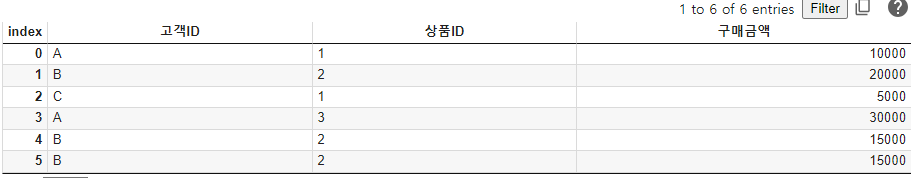
  * 고객별 구매 금액 합계
  * 상품별 구매 금액 합계
  * 고객별로 가장 많이 구매한 상품

In [31]:
# 데이터셋
data = [
  {"customer_id": "A", "product_id": "1", "amount": 10000},
  {"customer_id": "B", "product_id": "2", "amount": 20000},
  {"customer_id": "C", "product_id": "1", "amount": 5000},
  {"customer_id": "A", "product_id": "3", "amount": 30000},
  {"customer_id": "B", "product_id": "2", "amount": 15000},
  {"customer_id": "B", "product_id": "2", "amount": 15000}
]
# 고객_id	product_id	amount	customer_id

In [32]:
import pandas as pd

# 데이터프레임 탐색하기
# 1) 주어진 데이터셋을 데이터프레임으로 변환하기
df = pd.DataFrame(data)
df


# 2) 데이터프레임을 첫 행부터 3번째 행까지 슬라이싱하기
df.head(3)

# 3)데이터프레임의 열 레이블 변경하기
df.rename(columns = {"customer_id":"고객_id", "product_id":"상품_id", "amount":"구매금액"}, inplace = True)
df

,고객_id,상품_id,구매금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000
5,B,2,15000


In [33]:
# 데이터프레임 정제하기
# 1) 결측치 데이터 확인하기
df.isna()

# 2) 중복 데이터 확인하기
# df.duplicated(subset = ["고객_id", "상품_id", "구매금액"], keep = "first")
df.duplicated()

# 3) 중복 데이터 제거
# df.drop_duplicates(subset = ["고객_id", "상품_id", "구매금액"], keep = "first")
df.drop_duplicates()

,고객_id,상품_id,구매금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000


In [17]:
# 데이터프레임 정렬하기
# 1) 고객ID의 값을 기준으로 데이터프레임의 행을 오름차순으로 정렬하기 : sort_values()
df = df.sort_values(by = ["고객_id"], ascending = True)
df


# 2) 데이터프레임의 기존의 인덱스을 변경 또는 재설정하기
df = df.reset_index(drop = True)
df

,고객_id,상품_id,구매금액
0,A,1,10000
1,A,3,30000
2,B,2,20000
3,B,2,15000
4,B,2,15000
5,C,1,5000


### 따로 해보기

In [18]:
# 데이터분석하기
# 1) 고객별 구매 금액 합계를 계산하기
result = df.groupby(['고객_id'])['구매금액'].sum()
print(result)

고객_id
A    40000
B    50000
C     5000
Name: 구매금액, dtype: int64


In [22]:
# 2) 상품별 구매 금액 합계를 계산하기
result = df.groupby(['상품_id'])['구매금액'].sum()
print(result)

상품_id
1    15000
2    50000
3    30000
Name: 구매금액, dtype: int64


In [36]:
# 3) 상위 최우수 고객 2명 필터링하기
result = df.groupby(['고객_id'])['구매금액'].sum().sort_values(ascending = False)
print(result.head(2))
print(result.idxmax())

고객_id
B    50000
A    40000
Name: 구매금액, dtype: int64
B


In [39]:
# 4) 고객에서 가장 인기있는 상품 찾기
result = df['상품_id'].value_counts()
print(f"best product ID : {result.idxmax()}")

best product ID : 2


고객_id
A    20000.00
B    16666.67
C     5000.00
Name: 구매금액, dtype: float64


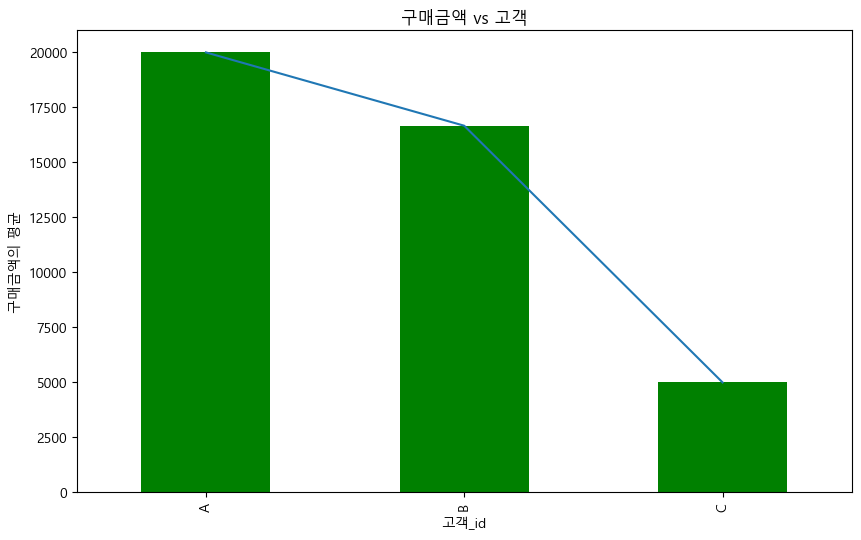

In [56]:
# 5) 고객ID별 구매금액의 평균를 계산하고, 그 결과를 막대 그래프로 시각화하기
result = round(df.groupby(['고객_id'])['구매금액'].mean(), 2)
print(result)

# result.plot.bar()
result.plot.line()
result.plot(kind = "bar", color = "green")
plt.title("구매금액 vs 고객")
plt.ylabel("구매금액의 평균")
plt.show()


고객_id  상품_id
A      1        10000
       3        30000
B      2        50000
C      1         5000
Name: 구매금액, dtype: int64


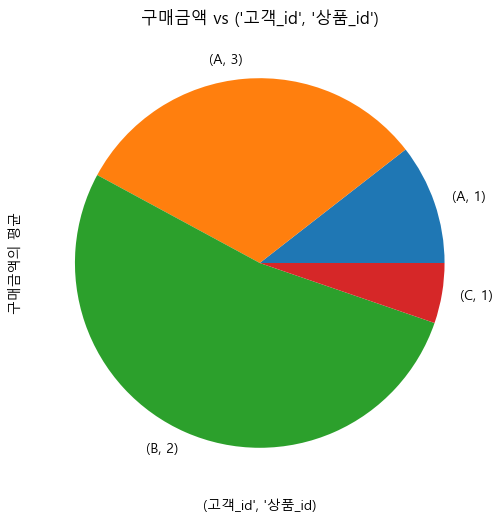

In [62]:
# 6) 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 합계를 계산하고 시각화하기
result = df.groupby(['고객_id', '상품_id'])['구매금액'].sum()
print(result)

#result.plot.bar()
result.plot(kind = "pie", color = "red")
plt.title("구매금액 vs ('고객_id', '상품_id')")
plt.ylabel("구매금액의 평균")
plt.xlabel("(고객_id', '상품_id)")
plt.show()


# 8장 다중색인(mutiIndex)
* 다중색인(multi-index)은 데이터프레임의 인덱스를 여러 열로 구성하는 것
* 다중색인 사용
  * 데이터를 여러 기준으로 그룹화
  * 데이터를 여러 기준으로 검색


In [96]:
# case1>
# 1. 단일 색인 -> 다중 색인 생성

# 1) 데이터프레임 생성
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
# print(df.index)
# print(df)
# print()

# 2) 다중 색인으로 사용할 튜플 리스트
index = [('X', 1), ('X', 2), ('Y', 1)]

# 3) 다중색인 설정
multi_index = pd.MultiIndex.from_tuples(index)
# print(multi_index)

# 4) 주어진 단일 데이터프레임에 다중 인덱스 적용
df.index = multi_index
# print(df)
# print()

#2.다중색인 사용
#1) 데이터프레임을 계층적 색인의 첫 번째 인덱스 레벨을 기준으로 그룹화하기
grouped = df.groupby(level = 0)


# 2)각 그룹에 대한 정보 출력하기
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()

Group: X
     A  B
X 1  1  4
  2  2  5

Group: Y
     A  B
Y 1  3  6



In [99]:
# case2> 
import pandas as pd

# 다중 인덱스를 가진 데이터프레임 생성
index = [['A', 'A', 'B', 'B'], [1, 2, 1, 2]] # 명목형 데이터
index = pd.MultiIndex.from_arrays(index, names=('first', 'second'))
df = pd.DataFrame({'data': [1, 2, 3, 4]}, index=index) 
print(df)

# 첫 번째 인덱스 수준을 기준으로 그룹화
grouped = df.groupby(level=0)

# 각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


              data
first second      
A     1          1
      2          2
B     1          3
      2          4
Group: A
              data
first second      
A     1          1
      2          2

Group: B
              data
first second      
B     1          3
      2          4



In [109]:
# case3>
# 1. 다중 색인 생성
# 단일 데이터프레임
df = pd.DataFrame({
    "data": [1, 2, 3, 4],
    "index1": ["A", "A", "B", "B"],
    "index2": [1, 2, 1, 2],
})
# print(df)
# print()

# 다중 색인을 가진 데이터프레임 / 문자열로 표시
df = df.set_index(["index1", "index2"])
# print(df)
# print()

# 2.다중 색인 사용
grouped = df.groupby(level=0)

# 1)각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


Group: A
               data
index1 index2      
A      1          1
       2          2

Group: B
               data
index1 index2      
B      1          3
       2          4



In [119]:
# 2) 데이터셋 슬라이싱 :
print(df)
print()

df.loc["A", 1] # 레벨 1에서 "A" 선택, 레벨 2에서 1 선택

df.loc["B", :] # 레벨 1에서 "B" 선택, 레벨 2에서 모든 값 선택

df.loc[[('A', 1),('B',1)]] # 레벨 1에서 "A"와 "B" 선택, 레벨 2에서 1 선택

               data
index1 index2      
A      1          1
       2          2
B      1          3
       2          4



,,data
index1,index2,
A,1,1
B,1,3


### [문제]: 다음 DataFrame에서 고객ID와 상품ID를 기준으로 다중색인을 만들고, 각 그룹의 구매금액의 합계를 계산하세요.

In [129]:
# 데이터셋
import pandas as pd

data = [
  {"고객ID": "A", "상품ID": "1", "구매금액": 10000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 20000},
  {"고객ID": "C", "상품ID": "1", "구매금액": 5000},
  {"고객ID": "A", "상품ID": "3", "구매금액": 30000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000}
]

# 1. 데이터프레임 생성
df = pd.DataFrame(data)
print(df)
print()
# 2. 고객ID와 상품ID을 기준으로 다중색인을 생성하여 데이터프래암 생성하기
df = df.set_index(["고객ID", "상품ID"])
print(df)
print()
#3. 데이터프레임의 다중색인을 출력하기
df.index

  고객ID 상품ID   구매금액
0    A    1  10000
1    B    2  20000
2    C    1   5000
3    A    3  30000
4    B    2  15000
5    B    2  15000

            구매금액
고객ID 상품ID       
A    1     10000
B    2     20000
C    1      5000
A    3     30000
B    2     15000
     2     15000



MultiIndex([('A', '1'),
            ('B', '2'),
            ('C', '1'),
            ('A', '3'),
            ('B', '2'),
            ('B', '2')],
           names=['고객ID', '상품ID'])

In [ ]:
# 4. 고객을 기준으로 묶어서 구매금액의 합을 계산하시오.


# 5. 상품을 기준으로 묶어서 구매금액의 합을 계산하시오.

# 6. 결과를 출력하시오.


# 9.2장. plotting with pandas and matplolib and seaborn


* Bar Plots (막대 그래프)
  * 막대 그래프는 범주형 데이터의 빈도, 비율 또는 백분율을 시각화 하는데 효과적 :
    * 빈도 분포 표시 : 범주병 빈도를 시각적으로 비교할 수 있다.
      * ex> 각각의 막대가 특정 항목의 빈도를 나타내며 막대의 높이는 해당 항목의 빈도에 비례
    * 비율 또는 백분율 표시 : 범주별로 전체의 비율 또는 백분율을 표시
      * 이것은 각 범주의 중요성이나 상대적인 크기를 비교하는데 유용
    * 시계열 데이터 표시 : 시간에 따른 변화를 보여줄 때 유용
      * 각 시점 또는 기간에 대한 데이터를 각각의 막대로 나타낼 수 있다.
    * 다중 변수의 비교 : 여러 범주에 대한 여러 그룹 간의 비교를 수행 사용
      * 이를 통해 각 그룹 간의 차이를 직관적으로 이해할 수 있다


              A         B         C         D
one    0.797158  0.471797  0.721399  0.189213
two    0.434596  0.823468  0.826273  0.189525
three  0.020102  0.703491  0.347270  0.419504
four   0.768089  0.962878  0.892565  0.134942
five   0.797805  0.682091  0.530053  0.865982
six    0.753248  0.093203  0.329439  0.412363


<Axes: >

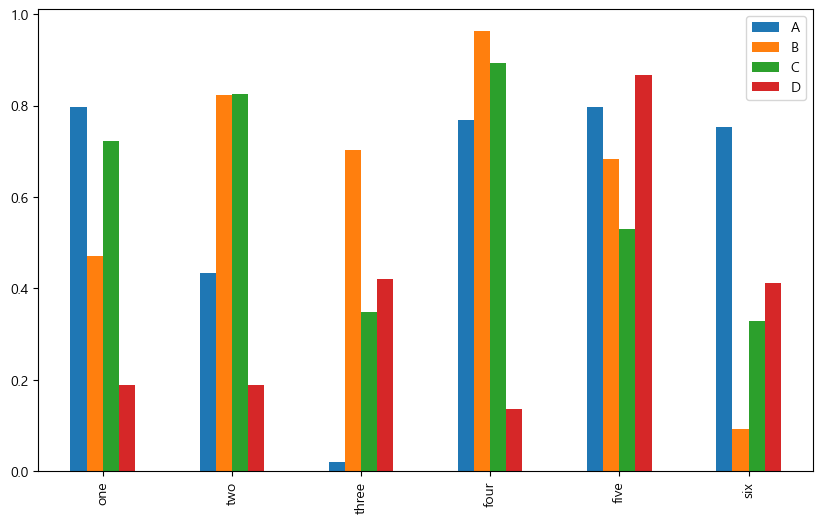

In [141]:
# ex> pandas dataframe의 plot.bar() : bar plot 사용법
# 1. DataSet 준비
data = np.random.uniform(size=(6,4)) # 24개의 데이터

# 2. 데이터프레임 생성
df = pd.DataFrame(data,
                  index = ["one", "two", "three", "four", "five", "six"],
                  columns = ["A","B", "C", "D"])
print(df)

# 3. 그래프 그리기
df.plot.bar()

## [예제]
* 'examples/tips.csv'을 로딩하여 'day'별에 따라 'size' 인원별 팁의 백분율을 보여주는 쌓인 막대 그래프를 그리기

<Axes: xlabel='tip_pct', ylabel='day'>

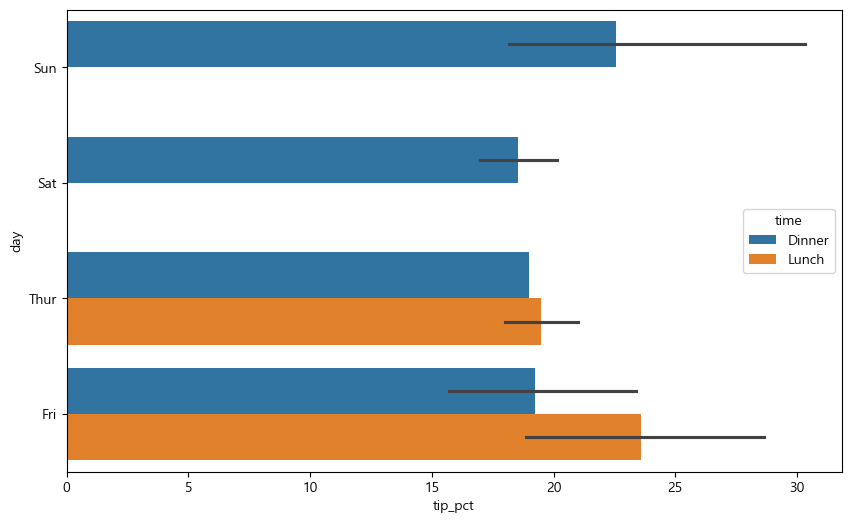

In [187]:
# 1. Load a dataset
tips = pd.read_csv('examples/tips.csv') # 데이터프레임
# print(tips)

# 2. 데이터프레임 생성 : 빈도수 표 만들기
party_counts = pd.crosstab(tips["day"], tips['size'])
# print(party_counts)

#3. 인덱스 재설정
party_counts = party_counts.reindex(index = ["Thur","Fri","Sat","Sun"])
# print(party_counts)

# 3. 필터링 : 불필요한 데이터 삭제
party_counts = party_counts.loc[:,2:5]
# print(party_counts)

# 4. 데이터 정규화 : 데이터 -> 비율로 계산
party_pcts = party_counts.div(party_counts.sum(axis = "columns"),
                              axis = "index")
# print(party_pcts)

# 5. 막대그래프로 그리기 [(쌓인 막대 그래프 : stacked=True), 기본값이 False]
# party_pcts.plot.bar(stacked=True)

# 6. 팁의 배분율 열 추가하기
# 팁의 비율 계산
tips["tip_pct"] = tips['tip'] / (tips['total_bill'] - tips['tip']) * 100
# print(tips)
sns.barplot(x = "tip_pct", y='day', data=tips, orient='h', hue='time') # orient = 'h'에서 'h'부분은 눞힐지 세울지 정하는 부분

## [문제] 다음 주어진 데이터셋에서 다음 작업을 수행하시오.
  * 나이가 30세 이상인 사람들의 이름을 출력하기
  * 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기
  * 이름이 'Bob'인 사람의 도시를 출력하기
  * 집에서 해볼 것

In [ ]:
# dataset
data = {
    'Name': ['John', 'Mary', 'Bob', 'Alice', 'Tom'],
    'Age': [20, 25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Dallas']
}

In [ ]:
# 1. 나이가 30세 이상인 사람들의 이름 출력하기



In [ ]:
# 2. 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기



In [ ]:
# 3. 이름이 'Bob'인 사람의 도시를 출력하기



# 10장 데이터 집계와 그룹 연산(매우 중요)
* 하나 이상의 키(함수, 배열, 데이터프레임의 열 이름)를 이용해서 판다스 객체(데이터프레임)를 여러 조각(그룹)으로 나누는 방법
* 합계, 평균, 표준편차, 사용자 정의 함수 같은 그룹 요약 통계를 계산하는 방법
* 정규화, 선형 회귀, 순위 또는 부분집합 선택 같은 그룹 내 변형이나 다른 조작을 적용하는 방법

* groupby() 연산에 대한 원리
    * 분리-적용-결합(split-apply-combine)
    * Aggregations refer to any data transformation that produces scalar values from arrays.
      * agg(), apply()

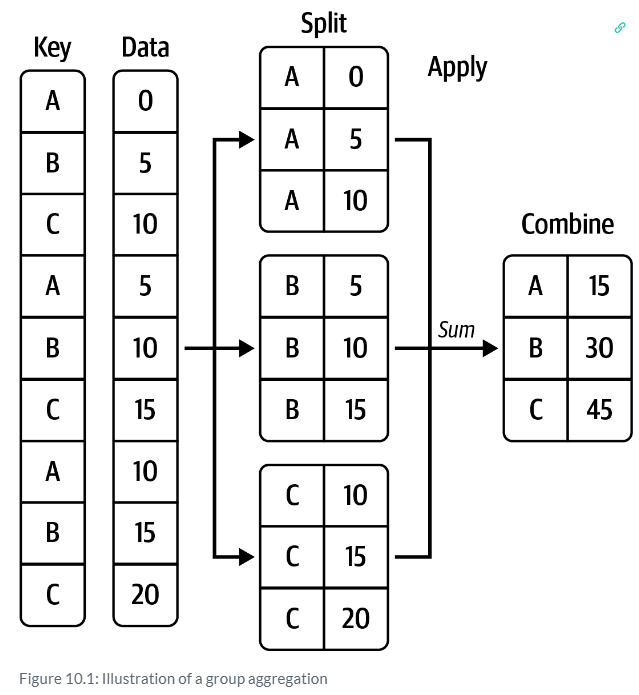

### [예제] 주어진 데이터를 key1으로 묶고 각 그룹에서 data1의 평균을 구하기

In [188]:
# 데이터셋
dataset = {"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)}
df = pd.DataFrame(dataset)
df

,key1,key2,data1,data2
0,a,1,-1.052256,0.065253
1,a,2,1.436603,-1.367524
2,None,1,-0.576207,-0.030280
3,b,2,-2.420294,0.940489
4,b,1,-1.062330,-0.642437
5,a,<NA>,0.237372,1.040179
6,None,1,0.000957,-1.082922


In [6]:
# 데이터셋
import pandas as pd

dataset = {"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)}
df = pd.DataFrame(dataset)
df
df.index # RangeIndex

RangeIndex(start=0, stop=7, step=1)

* groupby()
  * df.groupby(["컬럼명1", "컬럼명2"]).함수()
  * df.groupby(["컬럼명1", "컬럼명2"])[].함수()

In [7]:
# mean() - 주어진 데이터을 컬럼을 사용하여 각 그룹으로 묶어 평균 집계 
## 그룹 색인에서 누락된 값은 기본적으로 결과에서 제외됨
print(df)
print()

# result = df.groupby(["key1"]).mean() # 생성되어지는 데이터프레임의 색인 - "key1"
# result = df.groupby(["key1"]).size() # 각 그룹에 속하는 총 데이터 갯수
# result = df.groupby(["key1"]).count() # 총 컬럼별 각 그룹의 데이터 갯수
# result = df.groupby(["key1"]).sum() # 총 컬럼별 각 그룹의 데이터의 총 합
# print(result)

# result = df.groupby("key2").mean(numeric_only=True) # key1열이 결과에서 빠짐: df['key1']은 숫자 데이터가 아님

result = df.groupby(["key1", "key2"]).sum() # 다중 색인 데이터프레임(multiindex(key1, key2)
result.index

# 특히 대용량 데이터셋을 다룰 때 소수의 열(data2)만 집계(평균)하기
result = df.groupby(["key1", "key2"])[["data2"]].mean()
print(result)

   key1  key2     data1     data2
0     a     1 -0.204708  0.281746
1     a     2  0.478943  0.769023
2  None     1 -0.519439  1.246435
3     b     2 -0.555730  1.007189
4     b     1  1.965781 -1.296221
5     a  <NA>  1.393406  0.274992
6  None     1  0.092908  0.228913

              data2
key1 key2          
a    1     0.281746
     2     0.769023
b    1    -1.296221
     2     1.007189


## 예제: 10.2.1 열에 여러 가지 함수 적용하기
* Column-Wise and Multiple Function Application


* agg()
  * df.groupby()[컬럼 리스트].agg([집계함수 리스트])
  * 데이터프레임의 모든 열을 집계하려면 mean이나 std 같은 메서드를 호출하거나 agg를 통해 원하는 함수를 사용
  * 열에 따라 다른 함수를 사용해서 집계를 수행하거나 여러 개의 함수를 한 번에 적용하기

In [9]:
# 데이터셋 가져오기
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [11]:
# total_bill에서 팁의 비율을 tip_pct 열에 출가하기
tips["tip_pct"] = round(tips["tip"] / tips["total_bill"] * 100, 2)
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.94
1,10.34,1.66,No,Sun,Dinner,3,16.05
2,21.01,3.50,No,Sun,Dinner,3,16.66
3,23.68,3.31,No,Sun,Dinner,2,13.98
4,24.59,3.61,No,Sun,Dinner,4,14.68


In [19]:
# ex1
# grouped = tips.groupby(["day", "smoker"])
# grouped_pct = grouped["tip_pct"]
# # grouped_pct.mean()
# result = grouped_pct.agg("mean") # 기술 통계에서는 함수 이름을 문자열로 넘기기

result = tips.groupby(["day", "smoker"])["tip_pct"].agg(["mean"])

print(result)

                  mean
day  smoker           
Fri  No      15.165000
     Yes     17.478667
Sat  No      15.804222
     Yes     14.790000
Sun  No      16.011228
     Yes     18.724737
Thur No      16.028667
     Yes     16.385294


In [20]:
# ex2
def diff(arr) :
    return arr.max() - arr.min()

result = tips.groupby(["day", "smoker"])["tip_pct"].agg([diff, "mean", "std"])
print(result)


              diff       mean        std
day  smoker                             
Fri  No       6.73  15.165000   2.809703
     Yes     15.99  17.478667   5.129855
Sat  No      23.52  15.804222   3.976763
     Yes     29.01  14.790000   6.137342
Sun  No      19.33  16.011228   4.234462
     Yes     64.46  18.724737  15.412702
Thur No      19.33  16.028667   3.876920
     Yes     15.13  16.385294   3.939388


In [ ]:
# ex3 데이터프레임은 열마다 다른 함수를 적용하거나 여러 개의 함수를 모든 열에 적용하기
functions = ["count", "mean", "max", diff]
result = tips.groupby(["day", "smoker"])[["tip_pct", "total_bill"]].agg(functions)
print(result)

## # 10.2.2 색인되지 않은 형태로 집계된 데이터 반환하기
* 집계된 데이터는 유일한 그룹 키 조합으로 (어떤 경우에는 계층적 색인)되어 반환되었다.
* groupby메서드에 as_index=False를 넘겨서 색인 작업을 비활성화

In [21]:
grouped = tips.groupby(["day", "smoker"], as_index=False)
grouped.mean(numeric_only=True)

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,15.165000
1,Fri,Yes,16.813333,2.714000,2.066667,17.478667
2,Sat,No,19.661778,3.102889,2.555556,15.804222
3,Sat,Yes,21.276667,2.875476,2.476190,14.790000
4,Sun,No,20.506667,3.167895,2.929825,16.011228
5,Sun,Yes,24.120000,3.516842,2.578947,18.724737
6,Thur,No,17.113111,2.673778,2.488889,16.028667
7,Thur,Yes,19.190588,3.030000,2.352941,16.385294


## # 10.3 apply 메서드 : 일반적인 분리-적용-병합
* apply() 메서드는 groupby 메서드의 가장 일반적인 메서드
* apply 메서드는 객체를 여러 조각으로 나누고, 전달된 함수를 각 조각에 일괄적으로 적용한 후 이를 다시 합친다.
* df.groupby().apply(함수, 함수의 인자값 설정,..)

In [24]:
# 특정 열에서 가장 큰 값을 갖는 행을 선택하는 함수 정의
def top(df, n = 5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n] # 내림차순 정렬
# top 호출
top(tips, n = 3)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,71.03
178,9.60,4.00,Yes,Sun,Dinner,2,41.67
67,3.07,1.00,Yes,Sat,Dinner,1,32.57


In [25]:
result = tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")
print(result)

                 total_bill    tip smoker   day    time  size  tip_pct
smoker day                                                            
No     Fri  94        22.75   3.25     No   Fri  Dinner     2    14.29
       Sat  212       48.33   9.00     No   Sat  Dinner     4    18.62
       Sun  156       48.17   5.00     No   Sun  Dinner     6    10.38
       Thur 142       41.19   5.00     No  Thur   Lunch     5    12.14
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4    11.77
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3    19.68
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3     7.72
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4    11.60


C:\Users\c3543\AppData\Local\Temp\ipykernel_40440\1563265740.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")


In [ ]:
result = tips.groupby("smoker")["tip_pct"].describe()
result

In [ ]:
result.unstack("smoker")


## [문제] 
* 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 평균을 계산하고, 그 결과를 상품ID순으로 출력하세요.

In [ ]:
df = pd.DataFrame({
    "고객ID": [1, 2, 1, 3, 2, 3],
    "상품ID": [101, 102, 103, 101, 103, 102],
    "구매금액": [10000, 20000, 30000, 40000, 50000, 60000]
})

# 고객ID와 상품ID을 기준으로 그룹화하여 구매금액의 평균을 계산
average_spent_by_customer_product = df.groupby(["고객ID", "상품ID"])["구매금액"].mean()

# 상품ID을 기준으로 정렬하기
average_spent_by_customer_product = average_spent_by_customer_product.sort_index(level = "상품ID")
print(average_spent_by_customer_product)

# 막대그래프로 시각화하기
average_spent_by_customer_product.plot.bar()


# 그래프 부가 정보 추가하기
plt.title("Average Purchase Amount by Product ID")
plt.xlabel("Product ID")
plt.ylabel("Average Purchase Amount")
plt.show()